## 1 Вибірка

Імпорт бібліотек

In [70]:
import numpy as np
import matplotlib.pyplot as plt

Вивід вибірки для аналізу


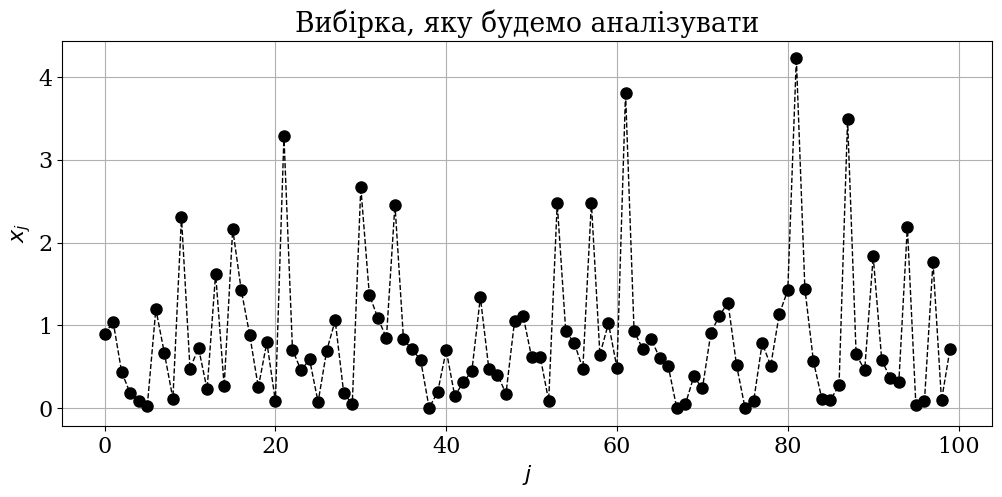

In [71]:
plt.rcParams.update({'font.size': 16, 'font.family': 'serif'})

x = np.loadtxt('Lb1_10_1.prn')

plt.figure(figsize=(12,5))

plt.plot(x[0:100], 'ko--', linewidth=1, markersize=8)

plt.title('Вибірка, яку будемо аналізувати')
plt.xlabel('$j$')
plt.ylabel('$x_j$')

plt.grid()
plt.show()

Найбільше і найменше значення вибірки


In [72]:
print(f"Найменше значення: {np.min(x)}")
print(f"Найбільше значення: {np.max(x)}")

Найменше значення: 0.001394
Найбільше значення: 6.433


Гістограма вибірки

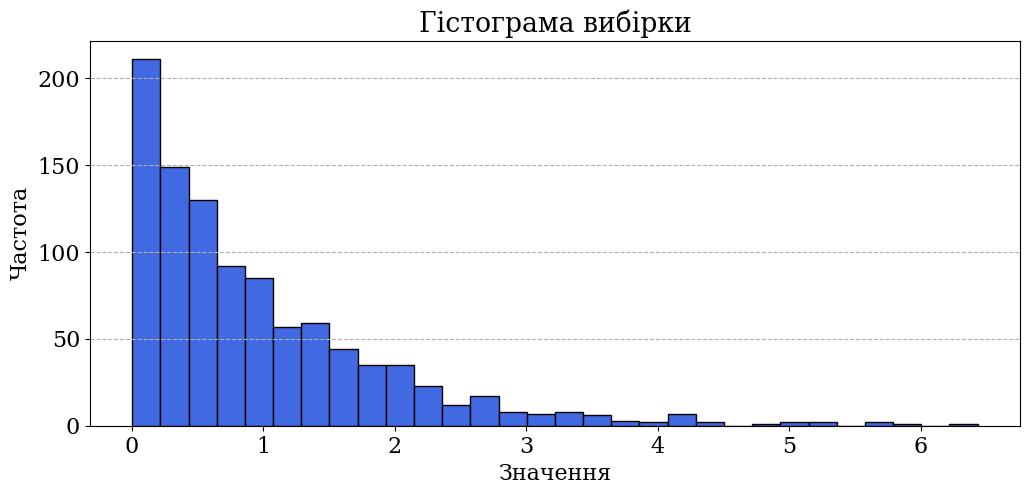

In [73]:
plt.figure(figsize=(12, 5))
plt.hist(x, bins=30, color='royalblue', edgecolor='black')

plt.title('Гістограма вибірки')
plt.xlabel('Значення')
plt.ylabel('Частота')

plt.grid(axis='y', linestyle='--')
plt.show()

Щільність

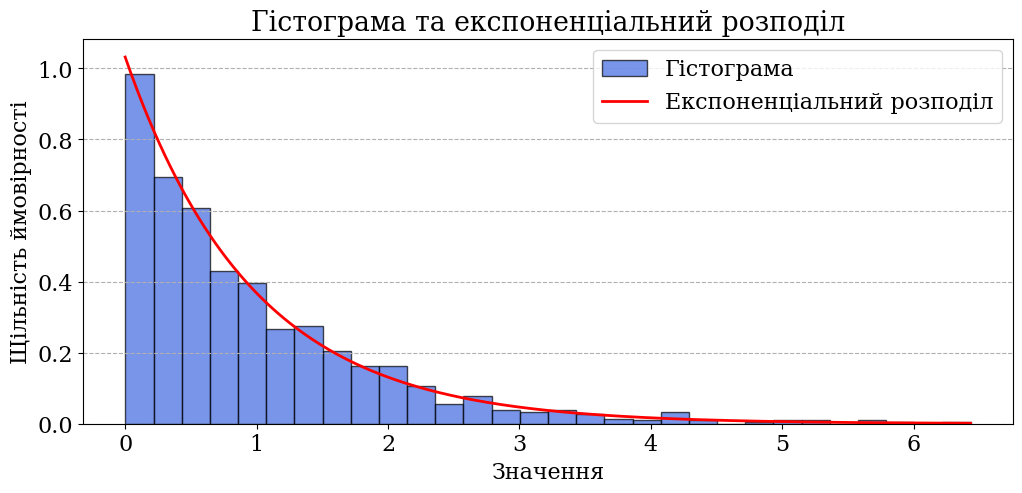

In [74]:
from scipy.stats import expon

lambda_hat = 1 / np.mean(x)

plt.figure(figsize=(12, 5))
plt.hist(x, bins=30, density=True, color='royalblue', edgecolor='black', alpha=0.7, label='Гістограма')

x_vals = np.linspace(0, np.max(x), 300)
plt.plot(x_vals, expon.pdf(x_vals, scale=1/lambda_hat), 'r-', lw=2, label='Експоненціальний розподіл')

plt.title('Гістограма та експоненціальний розподіл')
plt.xlabel('Значення')
plt.ylabel('Щільність ймовірності')
plt.legend()
plt.grid(axis='y', linestyle='--')

plt.show()


Параметр Лямбда

In [75]:
import numpy as np

lambda_hat = 1 / np.mean(x)

print(f"Оцінка параметра λ: {lambda_hat:.4f}")


Оцінка параметра λ: 1.0320


Ксі^2

In [76]:
from scipy.stats import expon, chi2
import numpy as np

x = np.random.exponential(scale=1.0, size=1000) 

lambda_hat = 1 / np.mean(x)

bins = 30
observed, bin_edges = np.histogram(x, bins=bins)

expected = len(x) * (expon.cdf(bin_edges[1:], scale=1/lambda_hat) - expon.cdf(bin_edges[:-1], scale=1/lambda_hat))

epsilon = 1e-10
expected = np.maximum(expected, epsilon)

chi2_stat = np.sum((observed - expected)**2 / expected)

df = bins - 1 - 1  # m - 1 - 1
chi2_crit = chi2.ppf(0.95, df)
p_value = 1 - chi2.cdf(chi2_stat, df)

print(f"Кількість інтервалів: m = {bins}.")
print(f"Ступені свободи: r = {df} (обчислені як m - 1 - 1 = {df}).")
print(f"Критичне значення: χ²₀.₉₅,{df} = {chi2_crit:.2f}.")
print(f"Результати тесту: χ²-статистика = {chi2_stat:.2f} < {chi2_crit:.2f}, p = {p_value:.4f}.")
print(f"Отже, H₀ {'не відхиляється' if chi2_stat < chi2_crit else 'відхиляється'}, вибірка {'узгоджується' if chi2_stat < chi2_crit else 'не узгоджується'} з експоненціальним розподілом.")


Кількість інтервалів: m = 30.
Ступені свободи: r = 28 (обчислені як m - 1 - 1 = 28).
Критичне значення: χ²₀.₉₅,28 = 41.34.
Результати тесту: χ²-статистика = 72.68 < 41.34, p = 0.0000.
Отже, H₀ відхиляється, вибірка не узгоджується з експоненціальним розподілом.


### 2 ВИБІРКА

Вибірка для аналізу

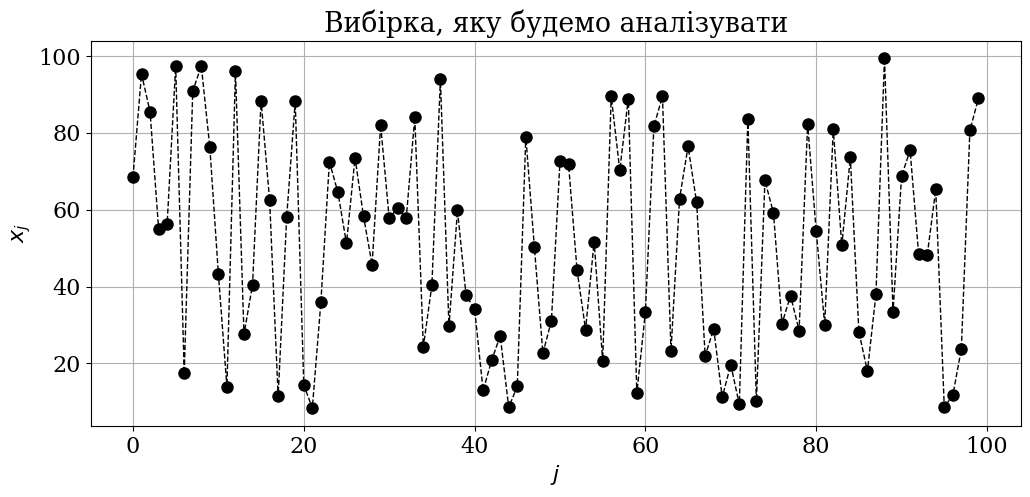

In [77]:
plt.rcParams.update({'font.size': 16, 'font.family': 'serif'})

x = np.loadtxt('Lb1_10_2.prn')

plt.figure(figsize=(12,5))

plt.plot(x[0:100], 'ko--', linewidth=1, markersize=8)

plt.title('Вибірка, яку будемо аналізувати')
plt.xlabel('$j$')
plt.ylabel('$x_j$')

plt.grid()
plt.show()

Найбільше та найменше значення

In [78]:
print(f"Найменше значення: {np.min(x)}")
print(f"Найбільше значення: {np.max(x)}")

Найменше значення: 8.164
Найбільше значення: 99.79


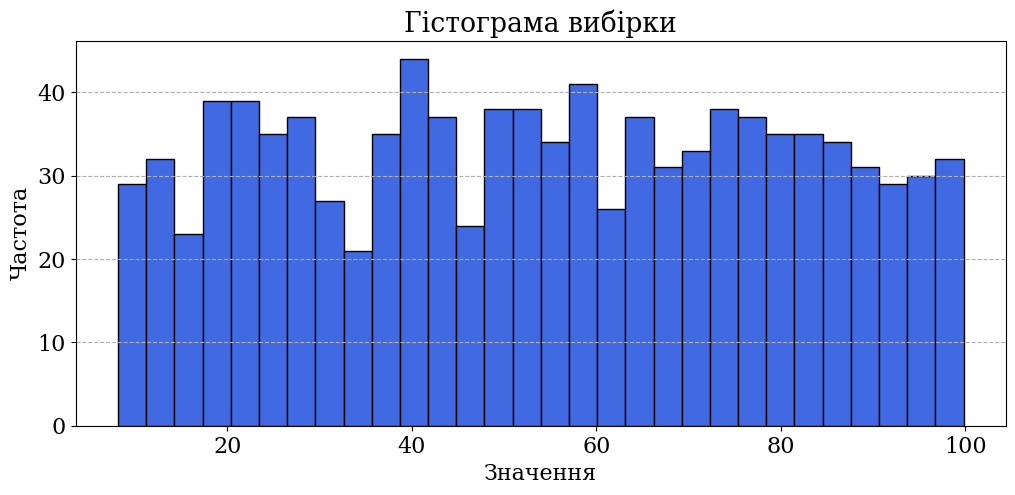

In [79]:
plt.figure(figsize=(12, 5))
plt.hist(x, bins=30, color='royalblue', edgecolor='black')

plt.title('Гістограма вибірки')
plt.xlabel('Значення')
plt.ylabel('Частота')

plt.grid(axis='y', linestyle='--')
plt.show()

Щільність

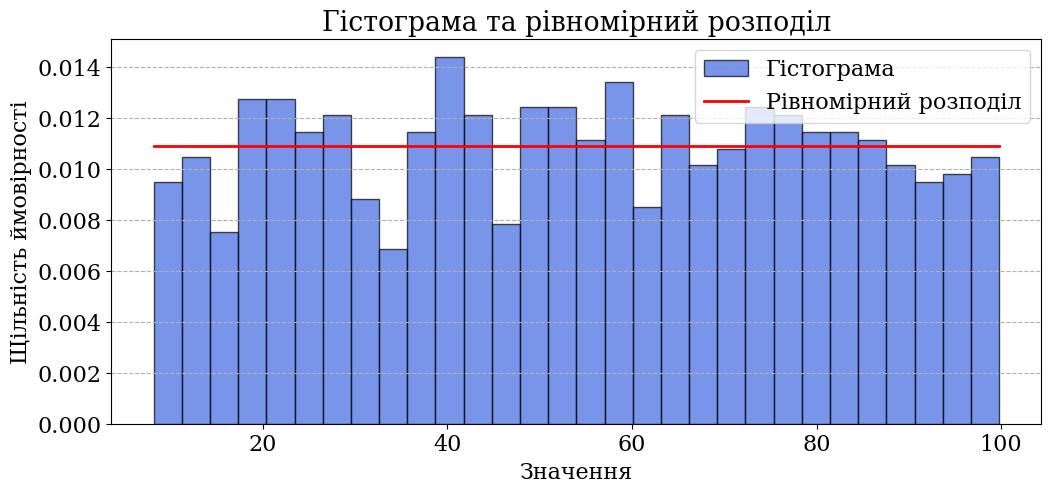

In [80]:
from scipy.stats import uniform

a, b = np.min(x), np.max(x)

# Побудова гістограми
plt.figure(figsize=(12, 5))
plt.hist(x, bins=30, density=True, color='royalblue', edgecolor='black', alpha=0.7, label='Гістограма')

x_vals = np.linspace(a, b, 300)
plt.plot(x_vals, uniform.pdf(x_vals, loc=a, scale=b-a), 'r-', lw=2, label='Рівномірний розподіл')

plt.title('Гістограма та рівномірний розподіл')
plt.xlabel('Значення')
plt.ylabel('Щільність ймовірності')
plt.legend()
plt.grid(axis='y', linestyle='--')

plt.show()


Ксі^2

In [81]:
from scipy.stats import uniform, chi2 
import numpy as np

a = np.min(x)  
b = np.max(x)  

bins = 30
observed, bin_edges = np.histogram(x, bins=bins)

expected = len(x) * (uniform.cdf(bin_edges[1:], loc=a, scale=b - a) - uniform.cdf(bin_edges[:-1], loc=a, scale=b - a))

chi2_stat = np.sum((observed - expected)**2 / expected)

df = bins - 1 - 2 
chi2_crit = chi2.ppf(0.95, df) 
p_value = 1 - chi2.cdf(chi2_stat, df)

print(f"Кількість інтервалів: m = {bins}")
print(f"Ступені свободи: r = {df} (обчислені як m - 1 - 2 = {df}).")
print(f"Критичне значення: χ²₀.₉₅,₂₇ = {chi2_crit:.2f}")
print(f"Результати тесту: χ²-статистика = {chi2_stat:.2f} < {chi2_crit:.2f}, p = {p_value:.4f}.")
print(f"Отже, H₀ {'не відхиляється' if chi2_stat < chi2_crit else 'відхиляється'}, вибірка {'узгоджується' if chi2_stat < chi2_crit else 'не узгоджується'} з рівномірним розподілом.")


Кількість інтервалів: m = 30
Ступені свободи: r = 27 (обчислені як m - 1 - 2 = 27).
Критичне значення: χ²₀.₉₅,₂₇ = 40.11
Результати тесту: χ²-статистика = 26.10 < 40.11, p = 0.5129.
Отже, H₀ не відхиляється, вибірка узгоджується з рівномірним розподілом.
